# HYBRID CNN-LSTM MODEL FOR STOCK PRICE PREDICTION

## Installing Quandl

In [1]:
# Need to install pip to use this code in Jupyter Notebook
# https://pip.pypa.io/en/stable/installation/
# Can use this code in Google Colab without installing pip
!pip install --upgrade quandl

## Libraries

In [2]:
import dataframe_image as dfi
import quandl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot as plt
import math 
keras = tf.keras
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras import losses
from tensorflow import keras
from tensorflow.keras.utils import plot_model

## Data Collection

In [3]:
#For dataset from quandl
#df = quandl.get("NSE/TCS", start_date='2013-01-01', end_date='2018-05-18', order='asc', authtoken='MbBgqV8qJ9LHs_Hch-fs')
#df = quandl.get("NSE/MRF", start_date='2013-01-01', end_date='2018-05-18', order='asc', authtoken='MbBgqV8qJ9LHs_Hch-fs')

#For dataset from Yahoo Finance
df=pd.read_csv('CPALL.BK.csv')

df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,46.25,46.25,45.75,45.75,37.890533,8795700
1,2013-01-03,46.00,46.00,44.50,44.50,36.855278,23589400
2,2013-01-04,44.25,44.75,44.00,44.75,37.062325,24372100
3,2013-01-07,45.00,45.50,44.50,45.25,37.476429,13661900
4,2013-01-08,45.25,46.00,45.00,46.00,38.097584,15380400


In [4]:
#Remove comment for CSV files outside Quandl
#Use for downloaded CSV files like CPALL.BK
#Fixes problem with Dates of CSV files
'''
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df
'''

"\ndf['Date'] = pd.to_datetime(df['Date'])\ndf.set_index(['Date'],inplace=True)\ndf\n"

## Feature Selection

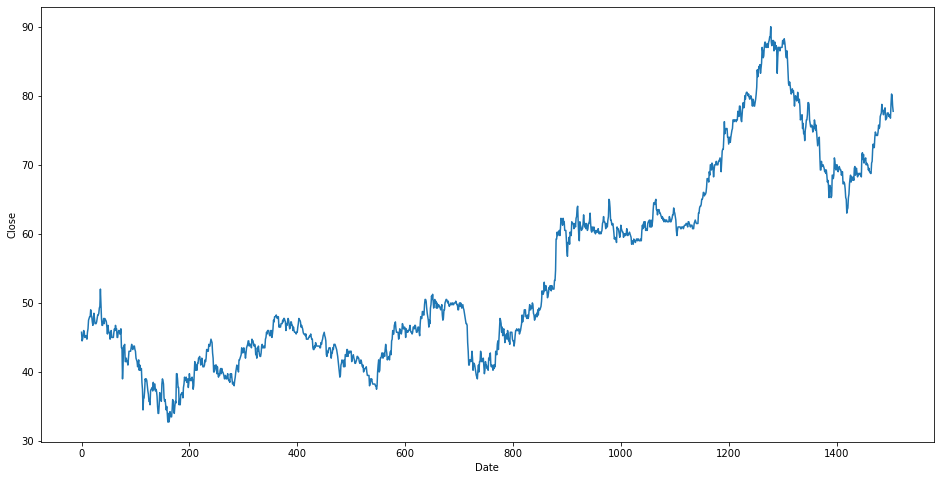

In [5]:
#Choose Closing Price only
df = df['Close']
data=pd.DataFrame(df)
plt.figure(figsize=(16,8))
df.plot()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [6]:
data=data.values

data.shape

(1506, 1)

## Data Splitting

In [7]:
train = []
test = []
k = math.ceil(len(df)*.8)

train = df[:k,]
test = df[k:,]

## Data Normalization

In [8]:
scaler = MinMaxScaler()

train = scaler.fit_transform(train.values.reshape(-1, 1))
test = scaler.transform(test.values.reshape(-1, 1))

## Sliding Window

In [9]:
mse_arr=[]
Z = []

window = 10

X_train= []
Y_train=[]
X_test= []
Y_test=[]

for i in range(len(train) - (window)):
    X_train.append(train[i:i+window])
    Y_train.append(train[i+window])
    
for i in range(len(test) - (window)):
    X_test.append(test[i:i+window])
    Y_test.append(test[i+window])
    

X_train=np.asanyarray(X_train)
Y_train=np.asanyarray(Y_train)
X_test=np.asanyarray(X_test)
Y_test=np.asanyarray(Y_test)

Xtrain = X_train[:,:,:]  
Ytrain = Y_train[:]  
Xtest = X_test[:,:,:]  
Ytest= Y_test[:]  

## Model Building

In [12]:
#uncomment to choose which model to run

model = tf.keras.Sequential()


#===========================================================================================
#CNN
model.add(keras.layers.Conv1D(
    filters= 128,
    kernel_size=2, 
    strides= 1, 
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(
    filters= 128,
    kernel_size=2, 
    strides= 1, 
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1, activation='relu'))
#===========================================================================================

"""
#===========================================================================================
#LSTM
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.LSTM(32,return_sequences=False))
model.add(keras.layers.Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="relu", kernel_initializer="uniform"))
#===========================================================================================


#===========================================================================================
#CNN LSTM BASELINE MODEL
model.add(keras.layers.Conv1D(
    filters= 64,
    kernel_size=2, 
    strides= 1, 
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(
    filters= 32,
    kernel_size=2, 
    strides= 1, 
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.LSTM(32,return_sequences=True))
model.add(keras.layers.LSTM(16,return_sequences=False))
model.add(keras.layers.Dense(32, activation="relu", kernel_initializer="uniform"))
model.add(keras.layers.Dense(1, activation="relu", kernel_initializer="uniform"))
#===========================================================================================


#===========================================================================================
#CNN LSTM PROPOSED MODEL
model.add(keras.layers.Conv1D(
    filters= 128,
    kernel_size=2, 
    strides= 1, 
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="relu"))
#===========================================================================================
"""

'\n#===========================================================================================\n#LSTM\nmodel.add(keras.layers.LSTM(128,return_sequences=True))\nmodel.add(keras.layers.LSTM(32,return_sequences=False))\nmodel.add(keras.layers.Dense(16, activation="relu", kernel_initializer="uniform"))\nmodel.add(keras.layers.Dropout(0.2))\nmodel.add(keras.layers.Dense(1, activation="relu", kernel_initializer="uniform"))\n#===========================================================================================\n\n\n#===========================================================================================\n#CNN LSTM BASELINE MODEL\nmodel.add(keras.layers.Conv1D(\n    filters= 64,\n    kernel_size=2, \n    strides= 1, \n    padding=\'same\',\n    activation=\'relu\'\n))\nmodel.add(keras.layers.MaxPooling1D(pool_size=2))\nmodel.add(keras.layers.Conv1D(\n    filters= 32,\n    kernel_size=2, \n    strides= 1, \n    padding=\'same\',\n    activation=\'relu\'\n))\nmodel.add(keras.layers.Max

In [13]:
#compiling model using the optimizers, loss function, and metric chosen
model.compile(optimizer='Nadam', loss='mse', metrics =['mae'])

In [14]:
# fit model
history = model.fit(Xtrain, Ytrain, epochs=100, verbose=1,validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0705 - val_loss: 0.0011 - val_mae: 0.0264
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0025 - val_mae: 0.0444
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0010 - val_mae: 0.0249
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 0.0021 - val_mae: 0.0401
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 9.6763e-04 - val_mae: 0.0255
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 3.7338e-04 - val_mae: 0.0145
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0331 - val_loss: 0.0015 - val_mae: 0.0329
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.

Epoch 60/100
30/30 [==============================] - 0s 2ms/step - loss: 8.0192e-04 - mae: 0.0208 - val_loss: 3.6741e-04 - val_mae: 0.0159
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 8.8286e-04 - mae: 0.0216 - val_loss: 0.0037 - val_mae: 0.0580
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 9.1244e-04 - mae: 0.0219 - val_loss: 6.3859e-04 - val_mae: 0.0204
Epoch 63/100
30/30 [==============================] - 0s 2ms/step - loss: 8.3864e-04 - mae: 0.0214 - val_loss: 6.6036e-04 - val_mae: 0.0210
Epoch 64/100
30/30 [==============================] - 0s 2ms/step - loss: 9.5513e-04 - mae: 0.0225 - val_loss: 8.6154e-04 - val_mae: 0.0250
Epoch 65/100
30/30 [==============================] - 0s 2ms/step - loss: 7.4392e-04 - mae: 0.0204 - val_loss: 3.2500e-04 - val_mae: 0.0131
Epoch 66/100
30/30 [==============================] - 0s 2ms/step - loss: 9.4408e-04 - mae: 0.0219 - val_loss: 6.5171e-04 - val_mae: 0.0206
Epoch 67/100
30/30 [====

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            32896     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

## Training

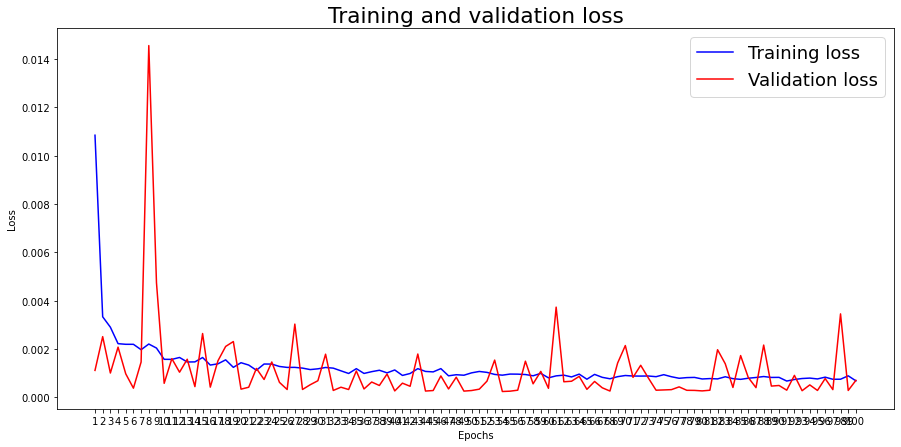

In [17]:
#Showing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

In [18]:
#Evaluating model
trainScore = model.evaluate(Xtrain, Ytrain, verbose=0)
testScore = model.evaluate(Xtest, Ytest, verbose=0)

## Prediction

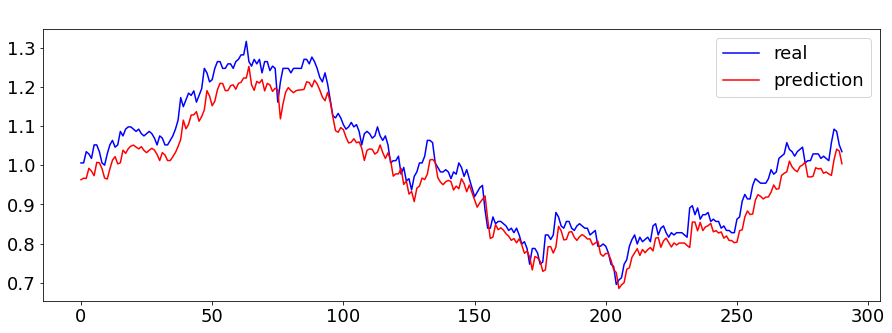

In [19]:
preds = model.predict(Xtest)

plt.figure(figsize=(15,5))
plt.title('MSE: {}'.format(trainScore[0]), color="white")
plt.plot(Ytest, 'b', label='real')
plt.plot(preds, 'r', label='prediction')

plt.legend(loc="best")

#for saving figures
#plt.savefig('CPALL_graph.png')
plt.show()

In [20]:
#denormalizing datasets
preds = scaler.inverse_transform(preds)
Ytest = scaler.inverse_transform(Ytest)

In [21]:
#Show Train and Test Scores
print('Train MSE \t Train RMSE \t Train MAE \t Testscore RMSE \tTest MAE')
print('%.9f \t %.9f \t %.9f \t %.9f \t\t %.9f' % (trainScore[0], math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Train MSE 	 Train RMSE 	 Train MAE 	 Testscore RMSE 	Test MAE
0.000445357 	 0.021103479 	 0.016046625 	 0.045023213 		 0.039590567


## Prediction Accuracy

In [22]:
print('MAE \t\t MAPE')
print('%.9f \t %.9f' % (mean_absolute_error(Ytest,preds),(np.mean(np.abs((Ytest - preds) / Ytest)) * 100)))

MAE 		 MAPE
1.722190621 	 2.218295979
